# IPerl display demo

author: Zaki Mughal

date: 2015-02-09

This notebook demonstrates how to use the *rich display system* in IPerl and how it can be extended on the fly.

All data that is displayed implements a `Displayable` role. This role requires a method called `iperl_data_representations` that returns a HashRef of different representations of the data where the keys are the MIME type of the data (e.g., `text/html`) and values are the strings that contain the bytestream for that MIME type. For example, with PNG, we have

In [1]:
use v5.16;
use DDP; # Data::Printer

my $png_display = Devel::IPerl::Display::PNG->new( "http://www.libpng.org/pub/png/PngSuite/ccwn3p08.png" );

say &np( [ keys %{ $png_display->iperl_data_representations } ] );

$png_display;

[
    [0] "image/png",
    [1] "text/html",
    [2] "text/plain"
]


Notice that I just displayed that PNG by just putting the `$png_display` variable at the end? That's because any displayable is automatically displayed if it is at the end of a cell.

But there's a problem: I don't want to type or remember `Devel::IPerl::Display::PNG` every time I want to load up a PNG.

Instead, you can just call the helper method `IPerl->png()` and you'll get the same result.

In [3]:
IPerl->png( "http://www.libpng.org/pub/png/PngSuite/ccwn3p08.png" );

There are other `Displayable`s too. For example, let's load up an `<iframe>`.

In [4]:
my $iframe_display = IPerl->iframe( "http://metacpan.org/recent", width => "75%" );

What if we want to display multiple things in one cell? For example, we want to loop over a number of images and display each of them?

You can do that by calling the `IPerl->display()` on the `Displayable` object.

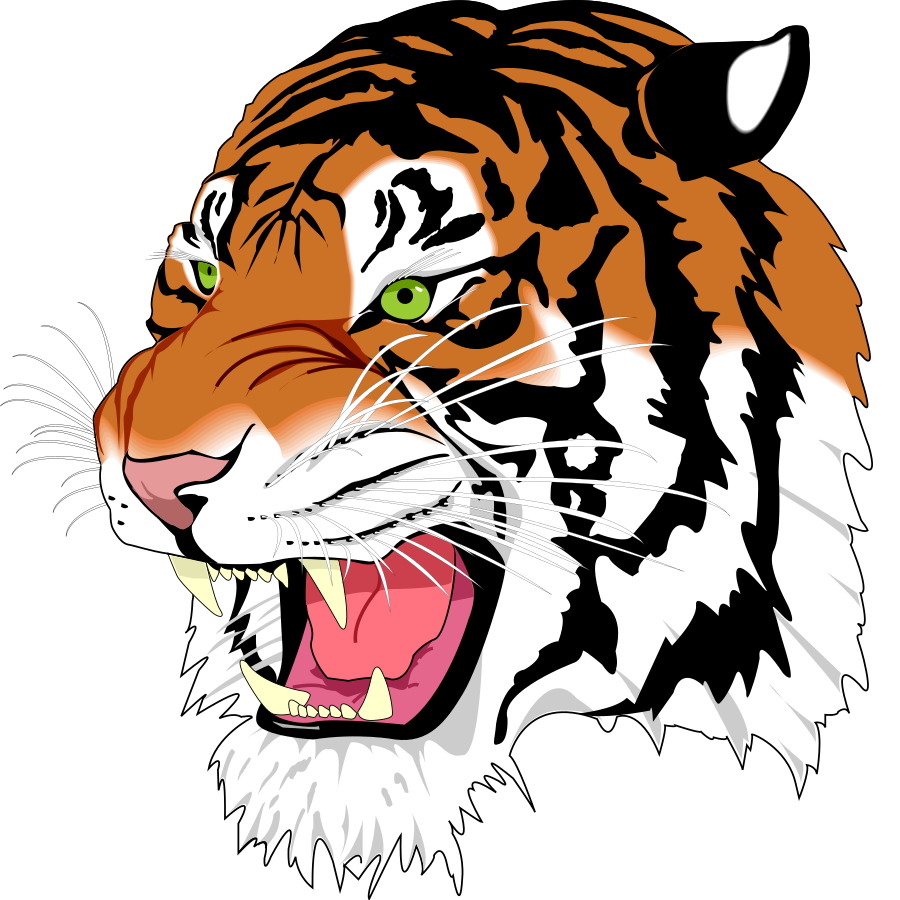

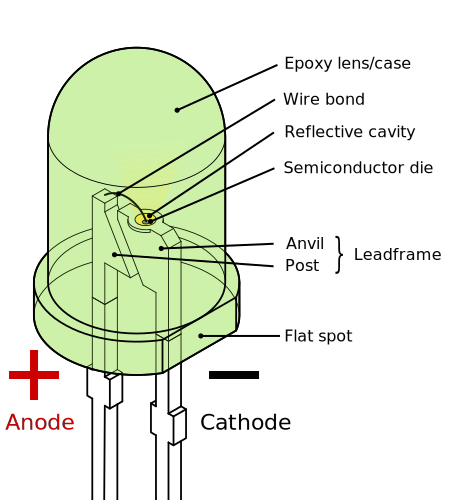

In [5]:
my @svg = split ' ', q[
        https://upload.wikimedia.org/wikipedia/commons/f/fd/Ghostscript_Tiger.svg
        https://upload.wikimedia.org/wikipedia/commons/f/f9/LED,_5mm,_green_(en).svg
    ];
IPerl->display( IPerl->svg( $_ , width => "200" ) ) for @svg;

$png_display;

There is also a way to display arbitrary HTML. Here, we create a simple HTML table that loops over a 2D nested ArrayRef.

We could send the string directly to the `IPerl->html()` method, but that isn't very [DRY](https://en.wikipedia.org/wiki/Don't_repeat_yourself). Instead, we'll create our own helper!

In [6]:
IPerl->helper( my_table => sub {
    my ($self, $data) = @_;
    return unless ref $data eq 'ARRAY';
    
    my $html = "<table>";
    for my $row (@$data) {
        $html .= "<tr>";
        for my $cell (@$row) {
             my $cell_html = $cell->iperl_data_representations->{"text/html"};
             $html .=  "<td>$cell_html</td>\n";
        }
        $html .= "</tr>";
    }
    $html .= "</table>";

    IPerl->html( $html );
});

my $N = 4; my $M = 10;
my $d = [ ([ ( $png_display ) x $M ]) x $N  ];
IPerl->my_table(  $d  );

"<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAMAAABEpIrGAAAABGdBTUEAAYagMeiWXwAAACBjSFJN AAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAC4lBMVEX2sN6J/3Xk/8UN/2vq /4w1/63/McCMSZeA/9b+JjT/sTTgMv4ciP//DnRR/yPFA9PIAWz/zi3/XqX+PmJP/3cz/1j+C5T/ LmMk/4h//8Rz/8z/p42D/4k9/7v/0eYb/5aW/8r/Ox1Zif+9GMf/H1x6PP/7+/zk/w4e/5yB/7VI 4v5BKP//qNwt/4P/nhxJE75g/6gl/9ER/3uS/0tS/9l+AJkdb//gFf33/B244P+1/97qfJzE//D8 /GT84OJxav/BgNrd3fX6YO4e/6Wm/9LJ/+Qr/1/2A3C0Nf8f/+jG/81d/4P/Z60r3P7/Ez1k4v4O /etF/77/Y0M9/4vIzu3K/xTC/0v/JqAa/5D8gs7/MIzS/zMXN/+jAGOO/73+//qb4P//GSwP/7AJ /38Q/0cU0v42/x3Hq87/77z/4Wb/yNrX+vGZ/+L7//r9+/zjAln/gUyL/xQfm/8P/5/g/v3U/9D/ cUz9F9mOyf//wB2e/4Dg/0oT/3tBwf/6+/w88f32u97/cMOx/yx+/x4h/2Gi/zGz/4QM/8oY/1gU 8/0J/11l/65H/43+Cj713u3/TK87AVv6/axA/52Y7/5d/35U/7TK/430/TyR/+MWp/9l/8g5A8ZP pf/s8P7/KWb9Cbeq++uc/7L/y52i/w/2NKm69/7/ha7jBOaj/2b/lpD/bxni/1j/44yW/+5B/2U9 /zYm/9xe/xv+P9Up/6Bn/9D/4eL6/urnS1Qhuf/Saf/91sK//4tryf+v/7r/8PJL/6D/x3v98XxT /+r/6B7///9p/0P/qC//G4b/NV5l/PX/kMT/TXX/QH9+/3L/cw7/Pqr/jhtv/6Ljo92b/z9A/68z /7Yn8/0a/zB8/93/e9H/TyU///B89v7/e1Mg/zmQAMT/1k//Vabv//Wvwf//Gq0+/9svV/+Apv8U /+3/kkxi/9r/tnqO5P/n4uPsAaT+Clkr/7S5uMPa/43S/+//nNC6/yvAE0qqAAACr0lEQVR4nGM4 QgAwEK3Ay9ttyt5c3Ao0u7pSUq6v98KlII6ZuaUj5fr1tCrsClyTa2pa3NzuXU/baJyLTcEkoxpd 3XVuouv5Nm68vA1TgVVyhIRusMg60fUbm5sLm7ZhKGCNiAgO7ukRWXf0aHPh4sXR8WgKXIvlN0/a v9/be8rRo5dbm0JDV8ejKphVrLF5/36DixennDW+3Po1VF3dFkXBoyTnzVemdndrXpRhXLEiLDra wuLwQWQFOUnOV4EKNDXjZKpWhIVVT7c4XFm5BknBlqQPsoGzpCTjFi5sa5u2evX0w4KVenqLEAoM wQokFVxc9u6e9snW9sEDwWN6F87tgin43G5oCDSAQ8HFymvaJ5aDmZkPuI5duHBu1S6ogrXthk9N Xt3gyLFyLWWaOHHNgQOvX768sGrVrVu7IApOBmwAKZixwOZzNlPGxEUHXr9+WVAWdEtRUdEOrOD2 C8/bh07eWLvAJvvRtoxdixZJr7x7NyiIkzMxkXMrSMGLF9eACu6sXWpTUrdva1bWqWUrrU+fFhY+ 4efXe2LfEYaSzs5r9Sfv3Jm8dOncPrmshi9fTi1bJiQEVCKu4tcrvI9hKVBey9//TYJliCODzpdT kY0+Qg/PnDkzb56Kyvve03IMk1N9fbX891RUPL50SefmzUaf/v7zUVHHeXnfv1exBrqS4U1qam3t nj0Vzx127nRy2rSJbUl4OFDaPf/0lzywN9/s2FFbO+f5c3uo/JMnYmLu+QIgzZCASpg5s2iOkpK9 hwc3N3d5+fz57wRit6fnIWLTsoiHR+mZqqqHh7n58nKgbKz1W5QkZ8ljZvZMGyzPrxwby56uhpaq 68zMYrS1Ve/fv286YQL72yPogOHI45iY2bP1JwBlP6phSIPTQ52jY8jHjx8xNcMTLV4AAPEBazSl s8MzAAAAAElFTkSuQmCC "" />","<img src=""data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAACAAAAAgCAMAAABEpIrGAAAABGdBTUEAAYagMeiWXwAAACBjSFJN AAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAC4lBMVEX2sN6J/3Xk/8UN/2vq /4w1/63/McCMSZeA/9b+JjT/sTTgMv4ciP//DnRR/yPFA9PIAWz/zi3/XqX+PmJP/3cz/1j+C5T/ LmMk/4h//8Rz/8z/p42D/4k9/7v/0eYb/5aW/8r/Ox1Zif+9GMf/H1x6PP/7+/zk/w4e/5yB/7VI 4v5BKP//qNwt/4P/nhxJE75g/6gl/9ER/3uS/0tS/9l+AJkdb//gFf33/B244P+1/97qfJzE//D8 /GT84OJxav/BgNrd3fX6YO4e/6Wm/9LJ/+Qr/1/2A3C0Nf8f/+jG/81d/4P/Z60r3P7/Ez1k4v4O /etF/77/Y0M9/4vIzu3K/xTC/0v/JqAa/5D8gs7/MIzS/zMXN/+jAGOO/73+//qb4P//GSwP/7AJ /38Q/0cU0v42/x3Hq87/77z/4Wb/yNrX+vGZ/+L7//r9+/zjAln/gUyL/xQfm/8P/5/g/v3U/9D/ cUz9F9mOyf//wB2e/4Dg/0oT/3tBwf/6+/w88f32u97/cMOx/yx+/x4h/2Gi/zGz/4QM/8oY/1gU 8/0J/11l/65H/43+Cj713u3/TK87AVv6/axA/52Y7/5d/35U/7TK/430/TyR/+MWp/9l/8g5A8ZP pf/s8P7/KWb9Cbeq++uc/7L/y52i/w/2NKm69/7/ha7jBOaj/2b/lpD/bxni/1j/44yW/+5B/2U9 /zYm/9xe/xv+P9Up/6Bn/9D/4eL6/urnS1Qhuf/Saf/91sK//4tryf+v/7r/8PJL/6D/x3v98XxT /+r/6B7///9p/0P/qC//G4b/NV5l/PX/kMT/TXX/QH9+/3L/cw7/Pqr/jhtv/6Ljo92b/z9A/68z /7Yn8/0a/zB8/93/e9H/TyU///B89v7/e1Mg/zmQAMT/1k//Vabv//Wvwf//Gq0+/9svV/+Apv8U /+3/kkxi/9r/tnqO5P/n4uPsAaT+Clkr/7S5uMPa/43S/+//nNC6/yvAE0qqAAACr0lEQVR4nGM4 QgAwEK3Ay9ttyt5c3Ao0u7pSUq6v98KlII6ZuaUj5fr1tCrsClyTa2pa3NzuXU/baJyLTcEkoxpd 3XVuouv5Nm68vA1TgVVyhIRusMg60fUbm5sLm7ZhKGCNiAgO7ukRWXf0aHPh4sXR8WgKXIvlN0/a v9/be8rRo5dbm0JDV8ejKphVrLF5/36DixennDW+3Po1VF3dFkXBoyTnzVemdndrXpRhXLEiLDra wuLwQWQFOUnOV4EKNDXjZKpWhIVVT7c4XFm5BknBlqQPsoGzpCTjFi5sa5u2evX0w4KVenqLEAoM wQokFVxc9u6e9snW9sEDwWN6F87tgin43G5oCDSAQ8HFymvaJ5aDmZkPuI5duHBu1S6ogrXthk9N Xt3gyLFyLWWaOHHNgQOvX768sGrVrVu7IApOBmwAKZixwOZzNlPGxEUHXr9+WVAWdEtRUdEOrOD2 C8/bh07eWLvAJvvRtoxdixZJr7x7NyiIkzMxkXMrSMGLF9eACu6sXWpTUrdva1bWqWUrrU+fFhY+ 4efXe2LfEYaSzs5r9Sfv3Jm8dOncPrmshi9fTi1bJiQEVCKu4tcrvI9hKVBey9//TYJliCODzpdT kY0+Qg/PnDkzb56Kyvve03IMk1N9fbX891RUPL50SefmzUaf/v7zUV

There are other plugins besides the `Displayable`s that work directly on file types (PNG, SVG, HTML, etc.).

For example, you can load a plugin that adds a role to [`PDL::Graphics::Gnuplot`](http://p3rl.org/PDL::Graphics::Gnuplot) and makes it displayable as an SVG.

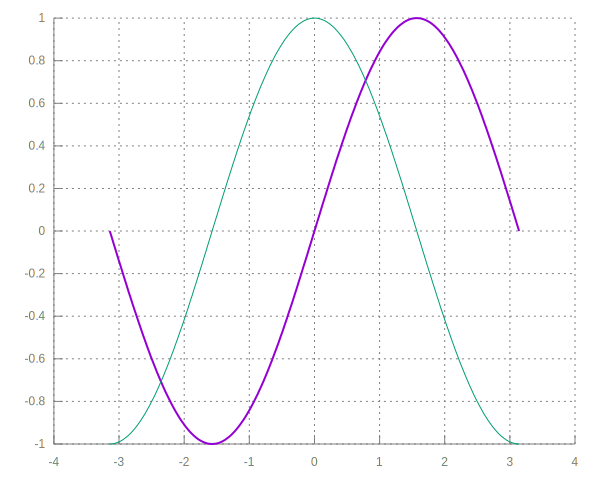

Warning: WARNING - dumping ON - gnuplot commands go to the terminal only.
 at /home/zaki/perl5/perlbrew/perls/perl-5.26.1/lib/site_perl/5.26.1/Devel/IPerl/Plugin/PDLGraphicsGnuplot.pm line 40.

(killed gnuplot)
 at /home/zaki/perl5/perlbrew/perls/perl-5.26.1/lib/site_perl/5.26.1/Devel/IPerl/Plugin/PDLGraphicsGnuplot.pm line 56.


In [7]:
IPerl->load_plugin( "PDLGraphicsGnuplot" );
use PDL;
use PDL::Graphics::Gnuplot;
use PDL::Constants qw(PI);

my $gp = gpwin();
# do some styling
$gp->option( topcmd => <<'GP');
# define axis
# remove border on top and right and set color to gray
set style line 11 lc rgb '#808080' lt 1
set border 3 back ls 11
set tics nomirror

# define grid
set style line 12 lc rgb '#808080' lt 0 lw 1
set grid back ls 12
GP

my $theta = zeros(200)->xlinvals(-1*PI, 1*PI);

$gp->plot( { lw => 2 }, $theta, sin($theta), {}, $theta, cos($theta)  );

IPerl->display( IPerl->tex( q| $\sin\theta$ and $\cos\theta$ | ) );

$gp;

Have fun and let me know what you make with your IPerl notebooks!

Feel free to add your notebooks to the [IPerl wiki](https://github.com/zmughal/p5-Devel-IPerl/wiki)!